1. supervised learning itu data nya punya label contoh : data titanic label nya survived atau not survived , jadi kita bikin suatu algoritma untuk prediksi ini passenger survived atau engga 

2. unsupervised learning itu datanya engga punya label contoh ada suatu data kita disuruh nyari insight dari data tersebut dan itu gada labelnya , misalkan customer data kita disuruh cari karakteristiknya 
  
  salah atu algoritma yang sering digunakan dalam  unsupervised learning:

  a. algoritma k-means clustering


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [ ]:
df=pd.read_csv('/content/wages.csv')

In [ ]:
df.head(10)

,Name,Age,Wages
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


suruh untuk ngeclustering semua gaji berdasarkan umur , ini kita gada label tapi kita cari karakteristik yang sama dari dataset ini 

Text(0.5, 1.0, 'Age vs Wages')

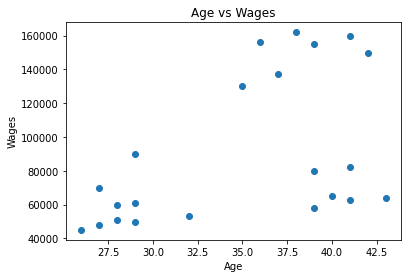

In [ ]:
plt.scatter(df['Age'],df['Wages'])
plt.xlabel('Age')
plt.ylabel('Wages')
plt.title('Age vs Wages')

In [ ]:
# cara pakai kmeans untuk determine cluster 
from sklearn.cluster  import KMeans

# train datanya
kmeans = KMeans(n_clusters=4)
cluster= kmeans.fit_predict(df[['Age','Wages']])
cluster

array([1, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3],
      dtype=int32)

In [ ]:
# append array cluster to dataset ( biar lebih enak dilihat dan gampang di mengerti )
# nah udah dapet nih clusternya 
df['Cluster']=cluster
df.head()

,Name,Age,Wages,Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,3
3,Ismail,28,60000,3
4,Kory,42,150000,0


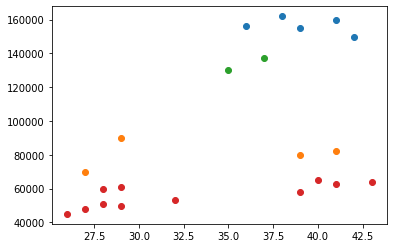

In [ ]:
# plot cluster biar kita ngerti konsep cluster
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]
df4=df[df['Cluster']==3]

plt.scatter(df1['Age'],df1['Wages'])
plt.scatter(df2['Age'],df2['Wages'])
plt.scatter(df3['Age'],df3['Wages'])
plt.scatter(df4['Age'],df4['Wages'])

clusteringnya salah (tidak efektif yang seharusnya satu cluster malah beda ) harus nya 3 cluster dia malah kasih kita 4 cluster, berarti ada 4 karakteristik yang berbeda padahal sehatusnya ada 3.

kita gabisa langsung asumsi karena kita ga setiap saat bisa plot sccatterplot kita , jadi caranya adalah kita pake elbow method di insdustri manapun kita pake elbow method.

caranya adalah dia jalanin semua angka neighbor 1 2 dst kemudian dia acess siapa yang performanya paling bagus(inersia)

In [ ]:
# elbow method 

dist=[]
k=range(1,10)

for i in k:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Age','Wages']])
  dist.append(kmeans.inertia_)

In [ ]:
dist

[39748148458.545456,
 3318233941.161905,
 1577046058.883117,
 814746044.2545455,
 296500418.0952381,
 231967084.4619048,
 177967003.79523814,
 119633613.78333333,
 92633459.7]

<Figure size 720x1080 with 0 Axes>

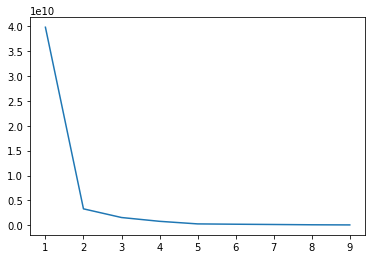

<Figure size 720x1080 with 0 Axes>

In [ ]:
plt.plot(k,dist)
plt.figure(figsize=(10,15))

jadi y adalah total inersia kita dan x adalah negihbor , kalau 1 neibor inertianya 4, kalau 2 neibor inertianya 0.5, jadi cara kita tau neibor yang paling bagus itu adalah kalian liat ketika grafik ini udah mulai stagnan(satu garis lurus) , 1 ke 2 masih lurus ke bawah , ketika 2 ke 3 dia udah mulai turun, sisanya itu dia udah mulai stagnan , ketika kita pakai elbow method kita bayangin aja siku kita lekukannya itu dimana , kalau liat disini antara 2 / 3, tapi kalo mau lebih pasti kita pakai 3 aja langsung 

itu lah cara kita tau kalo kita butuh 3 cluster , biasa flownya emang kaya gini kita pakai elbow method dulu supaya tahu kita butuh berapa cluster sebelum kita train clusternya, jadi kita akan tahu oh ini kita plot aja jadi 3 

In [ ]:
# train datanya
kmeans = KMeans(n_clusters=3,random_state=0) #random state ( data kita kan kalau train datanya agak random ya pas negbelahnya) kalau dikasih random state hasilnya akan sama terus ibarat dia kena save di sistem kita 
cluster= kmeans.fit_predict(df[['Age','Wages']])
cluster

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
# append array cluster to dataset ( biar lebih enak dilihat dan gampang di mengerti )
# nah udah dapet nih clusternya 
df['Cluster']=cluster
df.head()

,Name,Age,Wages,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


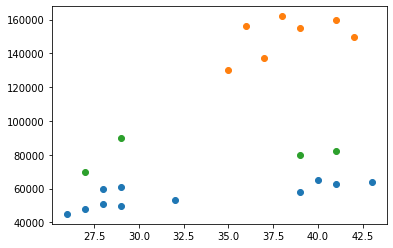

In [ ]:
# plot cluster biar kita ngerti konsep cluster
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]
# df4=df[df['Cluster']==3]

plt.scatter(df1['Age'],df1['Wages'])
plt.scatter(df2['Age'],df2['Wages'])
plt.scatter(df3['Age'],df3['Wages'])
# plt.scatter(df4['Age'],df4['Wages'])